# Métricas

## Matriz de confusión

Matriz de confusión sin normalizar
[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]
Matriz de confusión normalizada
[[1.   0.   0.  ]
 [0.   0.94 0.06]
 [0.   0.   1.  ]]


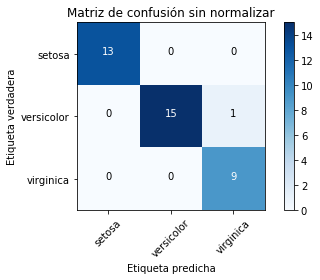

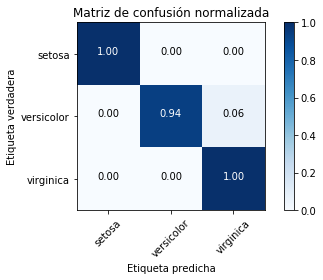

In [2]:
import itertools
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier 

# Importamos dataset iris de scikitlearn
iris = datasets.load_iris()
X = iris.data
y = iris.target
class_names = iris.target_names

# Dividimos en train test el conjunto
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Corremos un clasificador
classifier = DecisionTreeClassifier()
y_pred = classifier.fit(X_train, y_train).predict(X_test)


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Matriz de confusión',
                          cmap=plt.cm.Blues):
    """
    Esta función de scikit-learn imprime y plotea 
    la matriz de confusión pasada por parámetro. 
    Si se le pasa por parámetro 
    `normalize=True`, se le aplicará una normalización.

    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Matriz de confusión normalizada")
    else:
        print('Matriz de confusión sin normalizar')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('Etiqueta verdadera')
    plt.xlabel('Etiqueta predicha')
    plt.tight_layout()


# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Matriz de confusión sin normalizar')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Matriz de confusión normalizada')

plt.show()

## GridSeach 

In [6]:
from sklearn.datasets import load_boston
boston = load_boston()
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(boston.data,
                                                    boston.target,
                                                    test_size=0.25,
                                                    random_state=33)

In [8]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
param_grid = [
    {'max_depth': [2, 3, 4], 'max_features': [2, 4, 6, 8]},
]


In [9]:
tree_reg = DecisionTreeRegressor()
grid_search = GridSearchCV(tree_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error', 
                           return_train_score=True)
grid_search.fit(X_train, y_train)

C:\Users\Dicsys\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'max_depth': [2, 3, 4], 'max_features': [2, 4, 6, 8]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_squared_error', verbose=0)

## Propiedades de GridSearch

In [10]:
grid_search.best_params_

{'max_depth': 4, 'max_features': 8}

In [11]:
grid_search.best_estimator_

DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=8,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [13]:
#El valor resultante de cada una de las cruzas que hizo el Grid
grid_search.cv_results_['mean_train_score']

array([-47.09, -39.23, -28.96, -27.5 , -35.25, -31.11, -16.81, -18.3 ,
       -24.74, -15.27, -11.38, -10.21])

In [15]:
#Ejecutamos el neg mean sqare error
np.sqrt(-grid_search.cv_results_['mean_train_score'])

array([6.86, 6.26, 5.38, 5.24, 5.94, 5.58, 4.1 , 4.28, 4.97, 3.91, 3.37,
       3.2 ])

In [16]:
#Ejecutamos el neg mean sqare error sobre test
np.sqrt(-grid_search.cv_results_['mean_test_score'])

array([7.91, 6.58, 6.48, 6.43, 7.11, 5.95, 5.55, 5.82, 5.89, 4.73, 4.9 ,
       4.05])

In [17]:
#Comparamos los datos de Test contra los datos de entrenamiento.

## RandomizedSearch

In [18]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint

param_grid = {'max_depth': sp_randint(2, 4), 'max_features': sp_randint(2, 8)}


In [19]:
tree_reg = DecisionTreeRegressor()
rand_search = RandomizedSearchCV(tree_reg, param_distributions=param_grid, cv=5,
                                 scoring='neg_mean_squared_error',
                                 n_iter=10,
                                 return_train_score=True)

rand_search.fit(X_train, y_train)

C:\Users\Dicsys\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
          fit_params=None, iid='warn', n_iter=10, n_jobs=None,
          param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002BAC577FBA8>, 'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002BAC5792748>},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score=True, scoring='neg_mean_squared_error',
          verbose=0)

In [20]:
rand_search.best_params_

{'max_depth': 3, 'max_features': 4}

In [21]:
rand_search.best_estimator_

DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=4,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [22]:
np.sqrt(-rand_search.cv_results_['mean_train_score'])

array([6.26, 5.54, 5.62, 6.43, 4.77, 7.62, 5.84, 4.18, 5.73, 4.32])

In [23]:
np.sqrt(-rand_search.cv_results_['mean_test_score'])

array([6.55, 7.16, 6.19, 7.06, 5.29, 8.01, 6.56, 5.58, 7.12, 5.63])

In [24]:
# Comparamos los resultados entre Randomizedsearch y GridSearch
print("Promedio GridSearch RMSE: ", np.sqrt(-grid_search.cv_results_['mean_test_score']).mean())
print("Promedio RandomizedSearch RMSE: ", np.sqrt(-rand_search.cv_results_['mean_test_score']).mean())

Promedio GridSearch RMSE:  5.950008029216438
Promedio RandomizedSearch RMSE:  6.514059898193987


## Cambiando el scoring en GridSearch

In [17]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
param_grid = [
    {'max_depth': [2, 3, 4], 'max_features': [2, 4, 6, 8]},
]
tree_reg = DecisionTreeRegressor()
grid_search_r2 = GridSearchCV(tree_reg, param_grid, cv=5,
                           scoring='r2', return_train_score=True)
grid_search_r2.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'max_depth': [2, 3, 4], 'max_features': [2, 4, 6, 8]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='r2', verbose=0)

## Evaluación en test set

In [25]:
y_pred = grid_search.predict(X_test)

In [26]:
from sklearn.metrics import mean_squared_error

In [27]:
np.sqrt(mean_squared_error(y_test, y_pred))

5.0748836981760554

In [28]:
y_pred = rand_search.predict(X_test)

In [29]:
np.sqrt(mean_squared_error(y_test, y_pred))

5.927600042685146

## Oversampling 

Ejemplo extra de oversample

In [31]:
# Authors: Fernando Nogueira
#          Christos Aridas
#          Guillaume Lemaitre <g.lemaitre58@gmail.com>
# License: MIT

import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.decomposition import PCA

from imblearn.over_sampling import SMOTE

print(__doc__)


def plot_resampling(ax, X, y, title):
    c0 = ax.scatter(X[y == 0, 0], X[y == 0, 1], label="Class #0", alpha=0.5)
    c1 = ax.scatter(X[y == 1, 0], X[y == 1, 1], label="Class #1", alpha=0.5)
    ax.set_title(title)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    ax.spines['left'].set_position(('outward', 10))
    ax.spines['bottom'].set_position(('outward', 10))
    ax.set_xlim([-6, 8])
    ax.set_ylim([-6, 6])

    return c0, c1


# Generate the dataset
X, y = make_classification(n_classes=2, class_sep=2, weights=[0.3, 0.7],
                           n_informative=3, n_redundant=1, flip_y=0,
                           n_features=20, n_clusters_per_class=1,
                           n_samples=80, random_state=10)

# Instanciate a PCA object for the sake of easy visualisation
pca = PCA(n_components=2)
# Fit and transform x to visualise inside a 2D feature space
X_vis = pca.fit_transform(X)

# Apply regular SMOTE
kind = ['regular', 'borderline1', 'borderline2', 'svm']
sm = [SMOTE(kind=k) for k in kind]
X_resampled = []
y_resampled = []
X_res_vis = []
for method in sm:
    X_res, y_res = method.fit_sample(X, y)
    X_resampled.append(X_res)
    y_resampled.append(y_res)
    X_res_vis.append(pca.transform(X_res))

# Two subplots, unpack the axes array immediately
f, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2)
# Remove axis for second plot
ax2.axis('off')
ax_res = [ax3, ax4, ax5, ax6]

c0, c1 = plot_resampling(ax1, X_vis, y, 'Original set')
for i in range(len(kind)):
    plot_resampling(ax_res[i], X_res_vis[i], y_resampled[i],
                    'SMOTE {}'.format(kind[i]))

ax2.legend((c0, c1), ('Class #0', 'Class #1'), loc='center',
           ncol=1, labelspacing=0.)
plt.tight_layout()
plt.show()

ModuleNotFoundError: No module named 'imblearn'